### Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова ее цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Возьмем датасет с информацией о игроках НБА и их колледжах.

In [45]:
player_data = pd.read_csv('HW8 visualisation/player_data.csv')
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [46]:
print(player_data.shape)

(4550, 8)


In [47]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [48]:
player_data = player_data.dropna()
print(player_data.shape)

(4213, 8)


Построим столбчатую диаграмму распределения 10 универститетов, выпустивших наибольшее число игроков НБА. Используем столбцы колледж и имя, оба они относятся к качественным номинальным данным. Группируем данные по университетам, считаем количество имен по каждому университету. Имя из качественного показателя переходит в количественный. 

In [55]:
player_college = player_data.groupby('college')[['name']].count()\
    .sort_values('name', ascending=False).head(10)
    
player_college


,name
college,
University of Kentucky,99
"University of California, Los Angeles",91
University of North Carolina,86
Duke University,71
University of Kansas,71
Indiana University,60
University of Notre Dame,56
University of Louisville,55
University of Arizona,51


Text(0.5, 1.0, 'Top 10 Universities by Number of NBA Players')

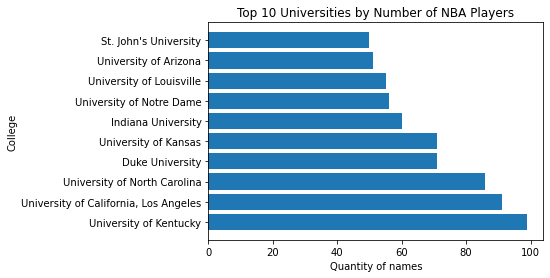

In [56]:
plt.barh(df['college'], df['name'])
plt.xlabel('Quantity of names') 
plt.ylabel('College')
plt.title('Top 10 Universities by Number of NBA Players')

График наглядно показывает соотношение количества игроков по университетам. Видим, на сколько отличается топ 3 университетов от остальных.

Из предыдущего графика видно, что Университет Кентуки выпустил наибольшее количество игроков НБА. Построим столбчатую диаграмму сравнения позиций игроков за всю историю Кентуки. Используем столбец позиция - это качественные порядковые данные.

In [68]:
player_data = player_data[player_data['college']=='University of Kentucky']

position_barh = player_data.groupby('position')[['college']].count()\
    .sort_values('college', ascending=False)
position_barh


,college
position,
G,41
F,26
C,9
C-F,9
G-F,7
F-C,4
F-G,3


Text(0.5, 1.0, 'Player positions')

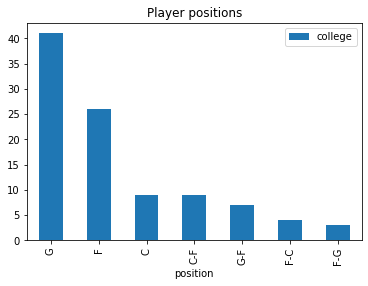

In [67]:
position_barh.plot(kind='bar')
plt.title('Player positions')

In [ ]:
На графике видно, что Кентуки в основном выпускает защитников и форвардов.

Возьмем датасет сезонной статистики НБА 1950 - 2017гг

In [7]:
seasons_stats = pd.read_csv('HW8 visualisation/Seasons_Stats.csv')
seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [33]:
print(seasons_stats.shape)

(24691, 53)


In [34]:
seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [21]:
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 12,9

Построим график распределения процента попадания трехочковых бросков c 2000 года. Используемые данные - столбец 3P%, численные непрерывные.

In [22]:
df = seasons_stats[seasons_stats['Year'] >= 2000]
df = df[seasons_stats['3P%'] > 0]


/var/folders/l8/px530y897nvcczrvsp9vx16m0000gn/T/ipykernel_1661/2395816823.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



/Users/iriska/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='3P%', ylabel='Density'>

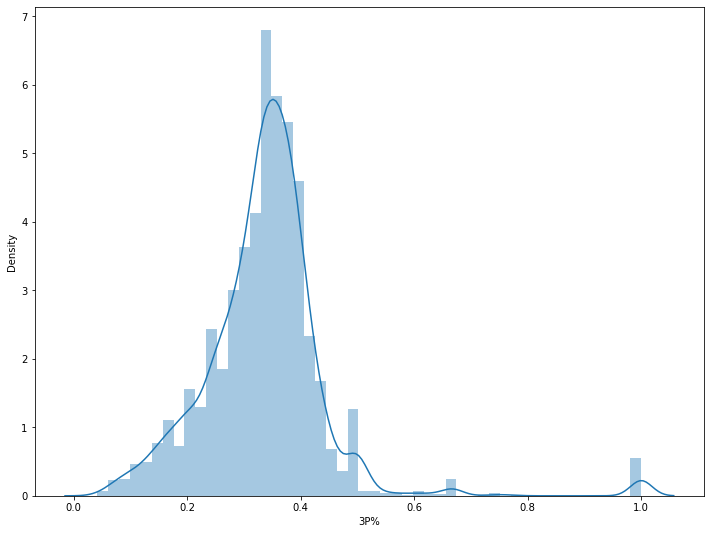

In [23]:
sns.distplot(df['3P%'])

На графике видно, что у очень малого числа игроков процент реализации трехочковых приближается к единице.

Построим график pairplot, он покажет взаимосвязь процента попадания трехочковых (3Р%) и количеством набранных очков в матче (PTS). PTS - численная непрерывная переменная.

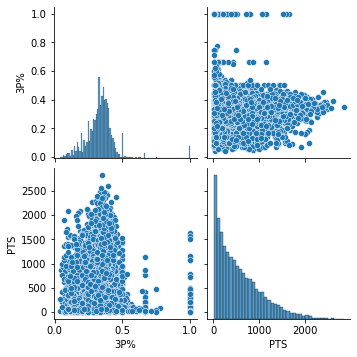

In [24]:
df_plot = sns.pairplot(
    df[['3P%', 'PTS']])
df_plot

График показывает, что между трехочковыми и рузультативностью имеется сильная корреляция. Чем выше процент реализации трехочковых, тем выше количество набранных очков. Это показывает современную тенденцию трехочкового баскетбола.

Построим боксплот распределения количества набранных очков (PTS) у 5 самых результативных игроков с 2000 по 2017 года. 
Player - качественные номинальные данные 
PTS - численные непрерывные данные

In [19]:
top_players = df.groupby('Player')[['PTS']].sum()\
    .sort_values('PTS', ascending=False).head(5).index.values
    
top_players

array(['Kobe Bryant', 'Dirk Nowitzki', 'LeBron James', 'Vince Carter',
       'Carmelo Anthony'], dtype=object)

<AxesSubplot:xlabel='Player', ylabel='PTS'>

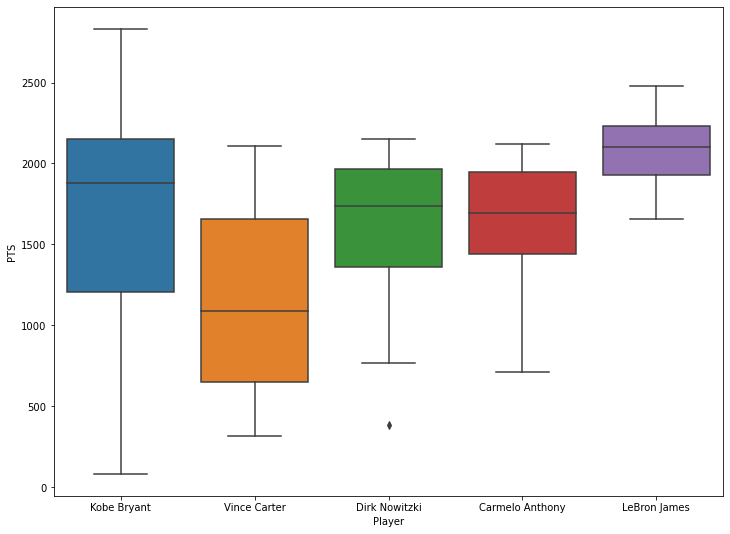

In [25]:
sns.boxplot(x="Player", y="PTS", 
            data=seasons_stats[seasons_stats.Player.isin(top_players)])

График показывает, что у всех игроков основные показатели сильно разнятся: медианы, межквартильные размахи, значения крайних квартилей